In [1]:
import tensorflow as tf ## pip install tensorflow-gpu
import cv2 ### pip install opencv-python
        ## pip install opencv-contrib-python  full package

import os 
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
new_model = tf.keras.models.load_model('Final_ModelV2.h5')

In [3]:
frame = cv2.imread("seif.jpg")
frame.shape

(1024, 768, 3)

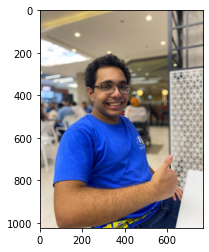

In [4]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 768)

In [7]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w , y+h),(255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

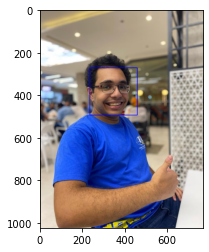

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

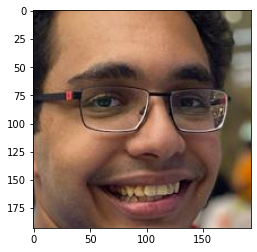

In [9]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [10]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [11]:
predictions = new_model.predict(final_image)
predictions[0]

array([3.7246686e-08, 1.5092346e-11, 1.9526479e-07, 9.9777323e-01,
       7.2205039e-05, 2.2747530e-07, 2.1541347e-03], dtype=float32)

In [12]:
if(np.argmax(predictions)==0):
    print("Angry")
elif(np.argmax(predictions)==1):
    print("Disguest")
elif(np.argmax(predictions)==2):
    print("Fear")
elif(np.argmax(predictions)==3):
    print("Happy")
elif(np.argmax(predictions)==4):
    print("Natural")
elif(np.argmax(predictions)==5):
    print("Sad")
elif(np.argmax(predictions)==6):
    print("Surprised")


Happy


In [13]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w , y+h),(255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font =cv2.FONT_HERSHEY_SIMPLEX
    
    predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    if (np.argmax(predictions)==0):
        status = "Angry"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==1):
        status = "Disguest"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==2):
        status = "Fear"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==3):
        status = "Happy"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==5):
        status = "Sad"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(predictions)==6):
        status = "Surprised"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    elif(np.argmax(predictions)==4):
        status = "Neutral"
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1 +w1, y1+ h1), (0,0,0), -1)
        cv2.putText(frame,status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100,150),font, 3,(0,0,255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
        
    cv2.imshow('Face Emotion Recognition',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d